In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# --------------------------------
# 1. Загрузка данных
# --------------------------------
df = pd.read_csv(
    "archive/household_power_consumption.txt",
    sep=";",
    na_values=["?", "NaN", "null"]
)

# Создание Datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.drop(['Date','Time'], axis=1, inplace=True)

print("\n=== Структура данных ===")
print("Размерность:", df.shape)
print("Типы данных:\n", df.dtypes)
print("Первые 5 строк:\n", df.head())
print("Описание данных:\n", df.describe())






=== Структура данных ===
Размерность: (2075259, 8)
Типы данных:
 Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object
Первые 5 строк:
    Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            Datetime  
0             0.0             1.0            17.0 2006

# --------------------------------
# 2. Очистка данных
# --------------------------------

In [2]:
print("\n=== Пропуски ===")
print(df.isna().sum())

# Дубликаты
print("\nКоличество дубликатов:", df.duplicated().sum())
df = df.drop_duplicates()


for col in df.columns:
    if df[col].dtype != 'object':
        print(f"{col}: min={df[col].min()}, max={df[col].max()}")

# Проверка на отрицательные или некорректные значения
for col in df.columns:
    if df[col].dtype != 'object':
        print(f"{col}: min={df[col].min()}, max={df[col].max()}")


=== Пропуски ===
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

Количество дубликатов: 0
Global_active_power: min=0.076, max=11.122
Global_reactive_power: min=0.0, max=1.39
Voltage: min=223.2, max=254.15
Global_intensity: min=0.2, max=48.4
Sub_metering_1: min=0.0, max=88.0
Sub_metering_2: min=0.0, max=80.0
Sub_metering_3: min=0.0, max=31.0
Datetime: min=2006-12-16 17:24:00, max=2010-11-26 21:02:00
Global_active_power: min=0.076, max=11.122
Global_reactive_power: min=0.0, max=1.39
Voltage: min=223.2, max=254.15
Global_intensity: min=0.2, max=48.4
Sub_metering_1: min=0.0, max=88.0
Sub_metering_2: min=0.0, max=80.0
Sub_metering_3: min=0.0, max=31.0
Datetime: min=2006-12-16 17:24:00, max=2010-11-26 21:02:00


# --------------------------------
# 3. Анализ одномерных распределений
# --------------------------------


=== Одномерный анализ числовых признаков ===

Колонка: Global_active_power
Среднее: 1.092
Медиана: 0.602
Мода: [0.218]
Стандартное отклонение: 1.057
Q1: 0.308, Q2: 0.602, Q3: 1.528
Минимум: 0.076, Максимум: 11.122
Асимметрия: 1.786, Эксцесс: 4.219


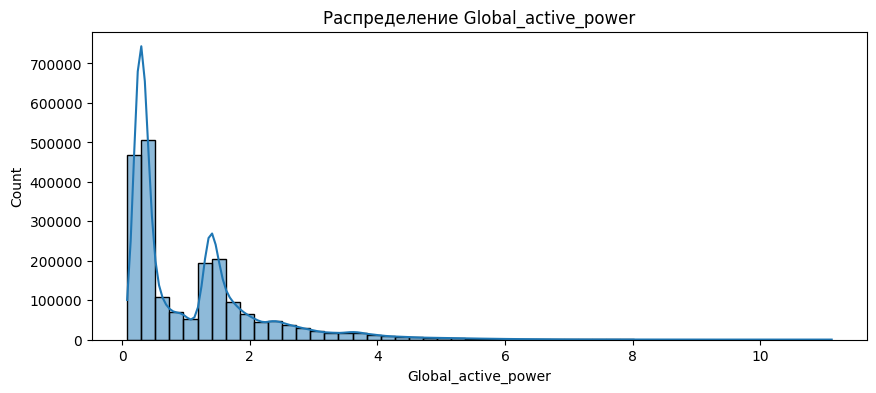


Колонка: Global_reactive_power
Среднее: 0.124
Медиана: 0.100
Мода: [0.]
Стандартное отклонение: 0.113
Q1: 0.048, Q2: 0.100, Q3: 0.194
Минимум: 0.000, Максимум: 1.390
Асимметрия: 1.262, Эксцесс: 2.606


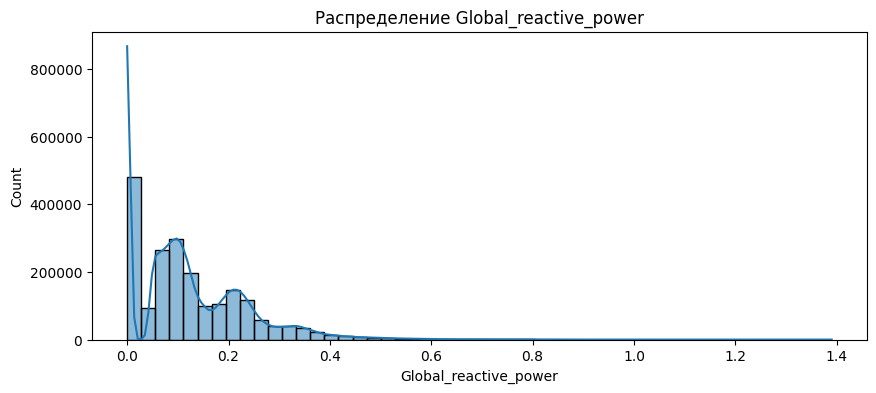


Колонка: Voltage
Среднее: 240.840
Медиана: 241.010
Мода: [241.18]
Стандартное отклонение: 3.240
Q1: 238.990, Q2: 241.010, Q3: 242.890
Минимум: 223.200, Максимум: 254.150
Асимметрия: -0.327, Эксцесс: 0.725


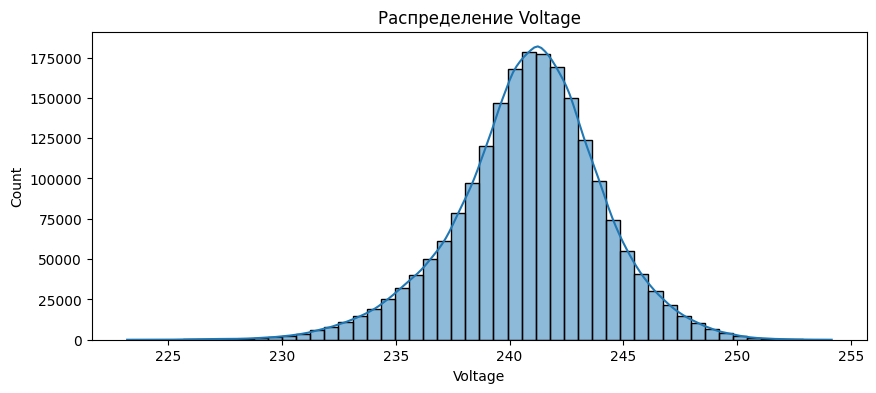


Колонка: Global_intensity
Среднее: 4.628
Медиана: 2.600
Мода: [1.]
Стандартное отклонение: 4.444
Q1: 1.400, Q2: 2.600, Q3: 6.400
Минимум: 0.200, Максимум: 48.400
Асимметрия: 1.849, Эксцесс: 4.601


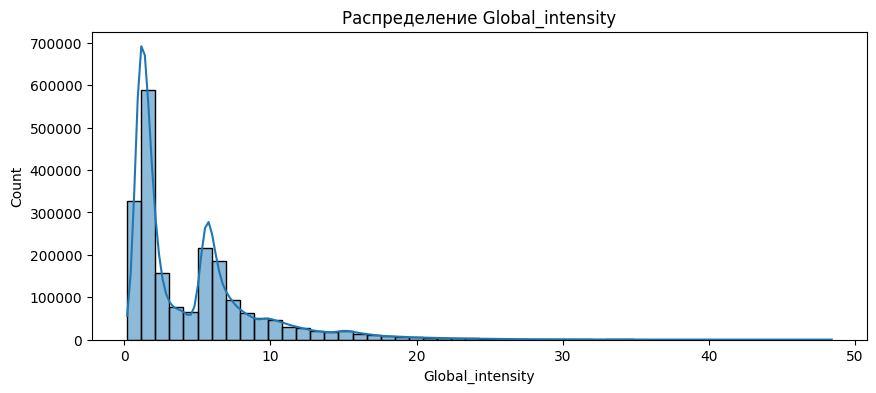


Колонка: Sub_metering_1
Среднее: 1.122
Медиана: 0.000
Мода: [0.]
Стандартное отклонение: 6.153
Q1: 0.000, Q2: 0.000, Q3: 0.000
Минимум: 0.000, Максимум: 88.000
Асимметрия: 5.945, Эксцесс: 35.643


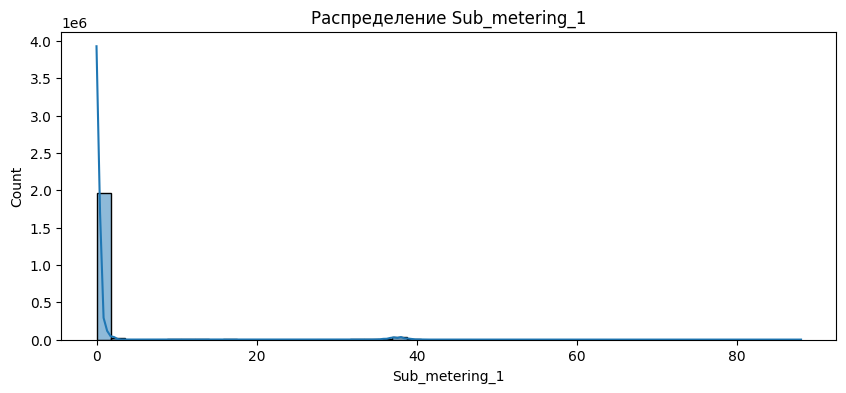


Колонка: Sub_metering_2
Среднее: 1.299
Медиана: 0.000
Мода: [0.]
Стандартное отклонение: 5.822
Q1: 0.000, Q2: 0.000, Q3: 1.000
Минимум: 0.000, Максимум: 80.000
Асимметрия: 7.091, Эксцесс: 57.907


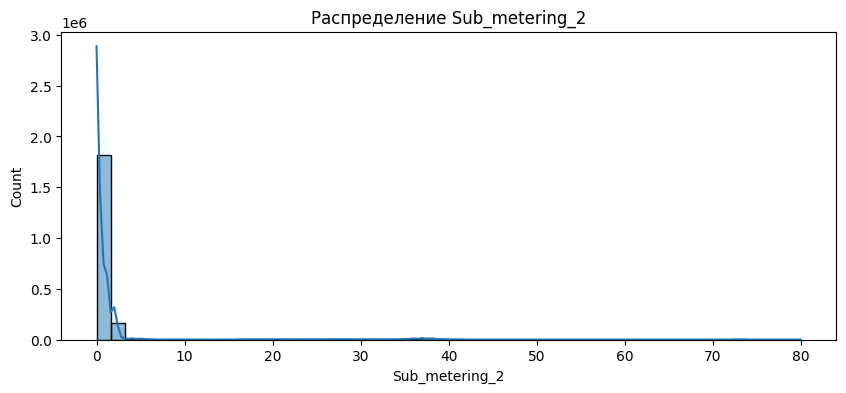


Колонка: Sub_metering_3
Среднее: 6.458
Медиана: 1.000
Мода: [0.]
Стандартное отклонение: 8.437
Q1: 0.000, Q2: 1.000, Q3: 17.000
Минимум: 0.000, Максимум: 31.000
Асимметрия: 0.725, Эксцесс: -1.282


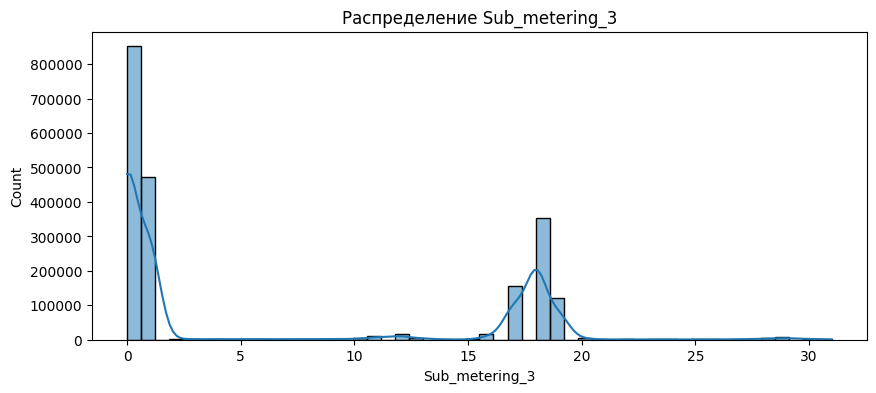

In [3]:
numeric_cols = df.select_dtypes(include=np.number).columns

print("\n=== Одномерный анализ числовых признаков ===")
for col in numeric_cols:
    data = df[col].dropna()
    print(f"\nКолонка: {col}")
    print(f"Среднее: {data.mean():.3f}")
    print(f"Медиана: {data.median():.3f}")
    print(f"Мода: {data.mode().values[:5]}")
    print(f"Стандартное отклонение: {data.std():.3f}")
    print(f"Q1: {data.quantile(0.25):.3f}, Q2: {data.quantile(0.5):.3f}, Q3: {data.quantile(0.75):.3f}")
    print(f"Минимум: {data.min():.3f}, Максимум: {data.max():.3f}")
    print(f"Асимметрия: {skew(data):.3f}, Эксцесс: {kurtosis(data):.3f}")
    # Визуализация
    plt.figure(figsize=(10,4))
    sns.histplot(data, bins=50, kde=True)
    plt.title(f"Распределение {col}")
    plt.show()

# --------------------------------
# 4. Анализ взаимосвязей
# --------------------------------


=== Корреляции Пирсона ===
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000

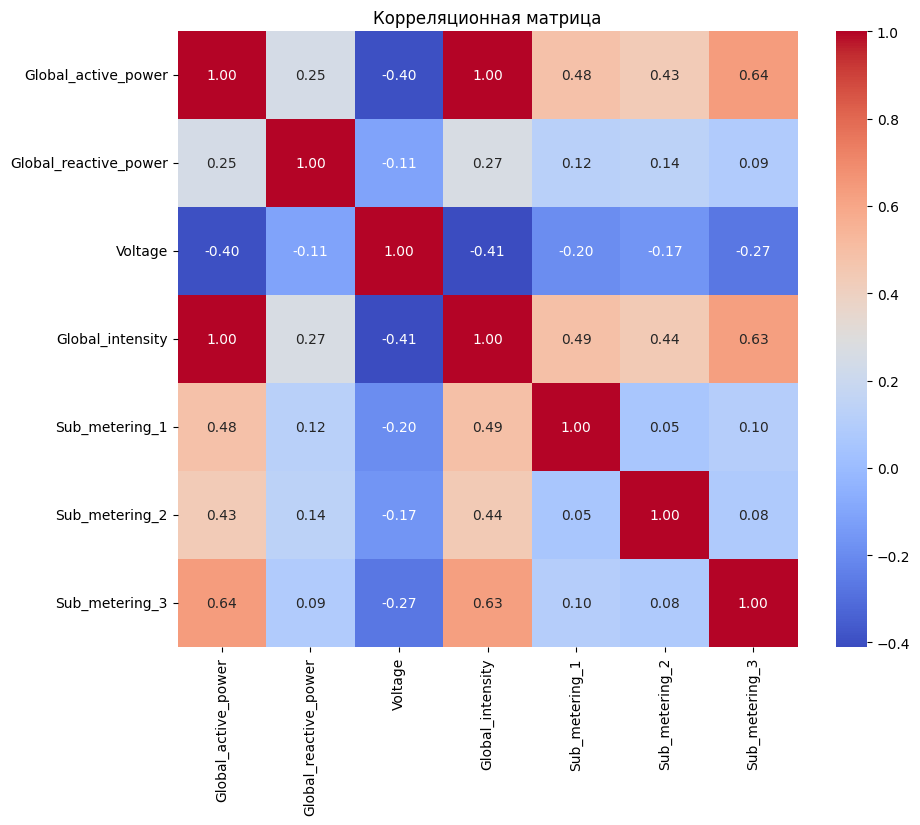


=== Корреляции Спирмена ===
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.269329 -0.325213   
Global_reactive_power             0.269329               1.000000 -0.094443   
Voltage                          -0.325213              -0.094443  1.000000   
Global_intensity                  0.995372               0.297814 -0.349364   
Sub_metering_1                    0.335149               0.117254 -0.182835   
Sub_metering_2                    0.186016               0.432778 -0.093046   
Sub_metering_3                    0.603609               0.071743 -0.183980   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.995372        0.335149        0.186016   
Global_reactive_power          0.297814        0.117254        0.432778   
Voltage                       -0.349364       -0.182835       -0.093046   
Global_intensity               1.00000

In [4]:
print("\n=== Корреляции Пирсона ===")
corr_matrix = df[numeric_cols].corr(method='pearson')
print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

print("\n=== Корреляции Спирмена ===")
corr_spearman = df[numeric_cols].corr(method='spearman')
print(corr_spearman)

# --------------------------------
# 5. Анализ целевой переменной (Global_active_power)
# --------------------------------

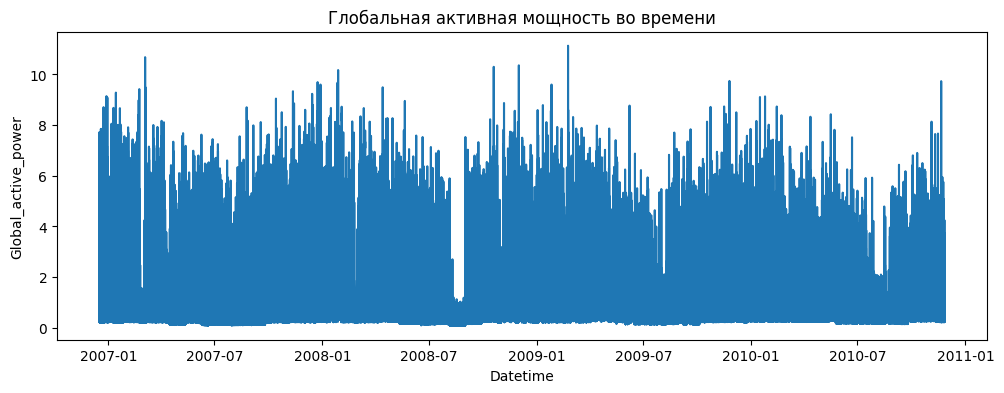

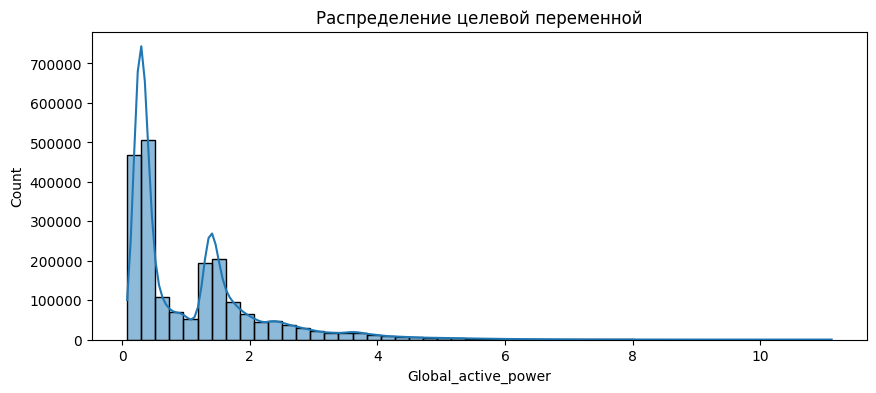

In [5]:
target = 'Global_active_power'
plt.figure(figsize=(12,4))
sns.lineplot(x=df['Datetime'], y=df[target])
plt.title("Глобальная активная мощность во времени")
plt.show()

# Распределение

plt.figure(figsize=(10,4))
sns.histplot(df[target], bins=50, kde=True)
plt.title("Распределение целевой переменной")
plt.show()

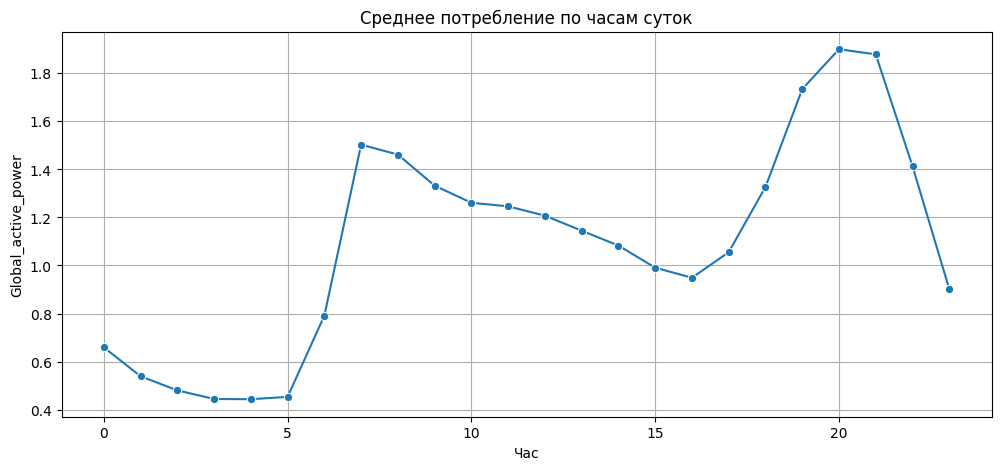

C:\Temp\ipykernel_10316\1011177195.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


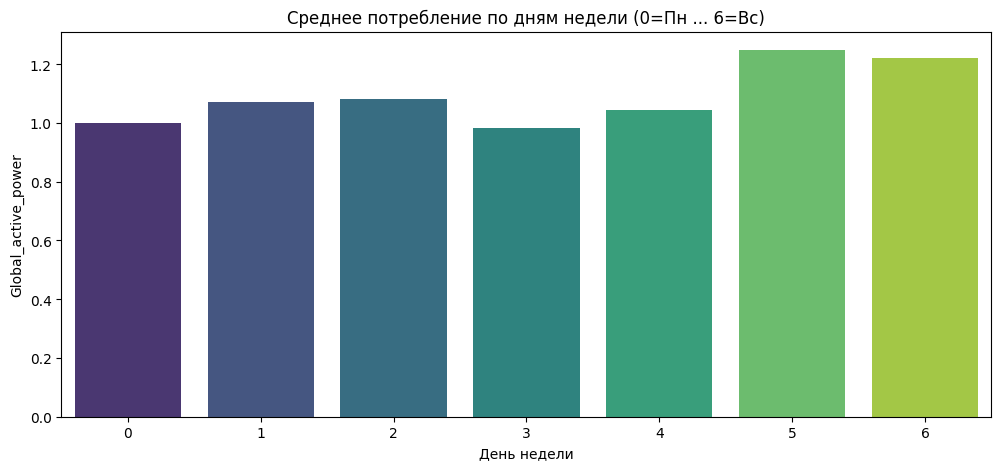

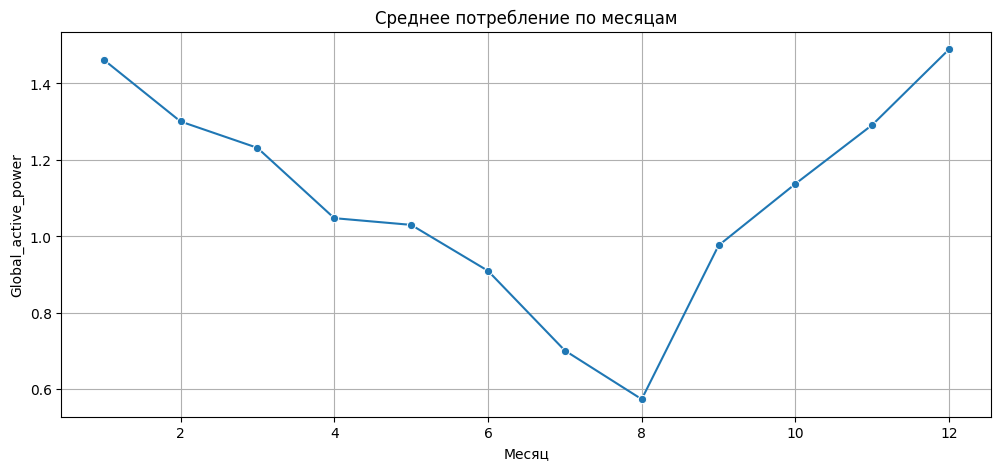

In [8]:
# ===============================
# РАСПРЕДЕЛЕНИЯ ПО ВРЕМЕННЫМ ГРУППАМ
# ===============================

df["hour"] = df["Datetime"].dt.hour
df["weekday"] = df["Datetime"].dt.dayofweek    # 0=Пн ... 6=Вс
df["month"] = df["Datetime"].dt.month

# --- Среднее по часам ---
plt.figure(figsize=(12,5))
sns.lineplot(data=df.groupby("hour")["Global_active_power"].mean(), marker="o")
plt.title("Среднее потребление по часам суток")
plt.xlabel("Час")
plt.ylabel("Global_active_power")
plt.grid(True)
plt.show()

# --- Среднее по дням недели ---
plt.figure(figsize=(12,5))
sns.barplot(
    x=df.groupby("weekday")["Global_active_power"].mean().index,
    y=df.groupby("weekday")["Global_active_power"].mean(),
    palette="viridis"
)
plt.title("Среднее потребление по дням недели (0=Пн ... 6=Вс)")
plt.xlabel("День недели")
plt.ylabel("Global_active_power")
plt.show()

# --- Среднее по месяцам ---
plt.figure(figsize=(12,5))
sns.lineplot(data=df.groupby("month")["Global_active_power"].mean(), marker="o")
plt.title("Среднее потребление по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Global_active_power")
plt.grid(True)
plt.show()


# --------------------------------
# 6. Аномалии и выбросы
# --------------------------------

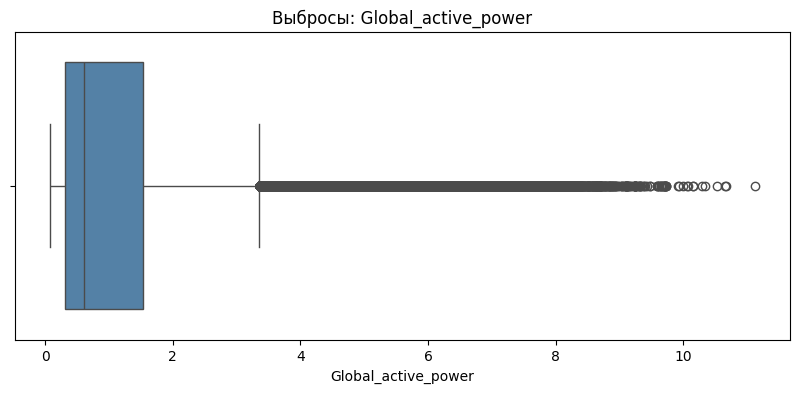

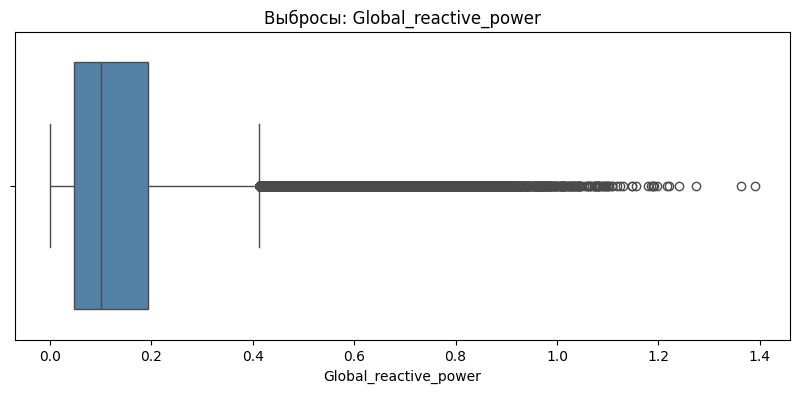

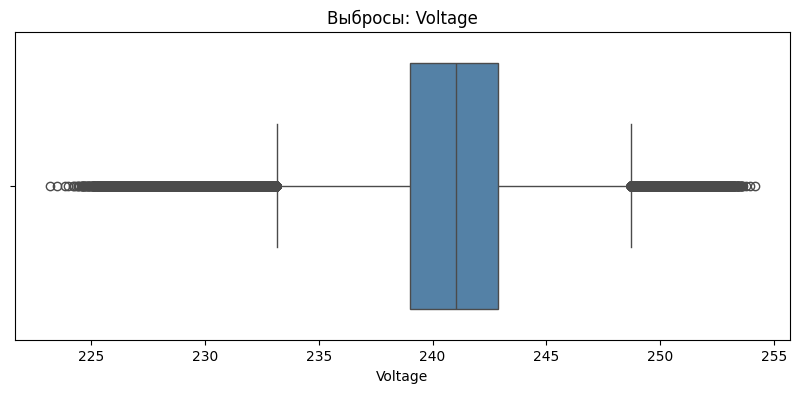

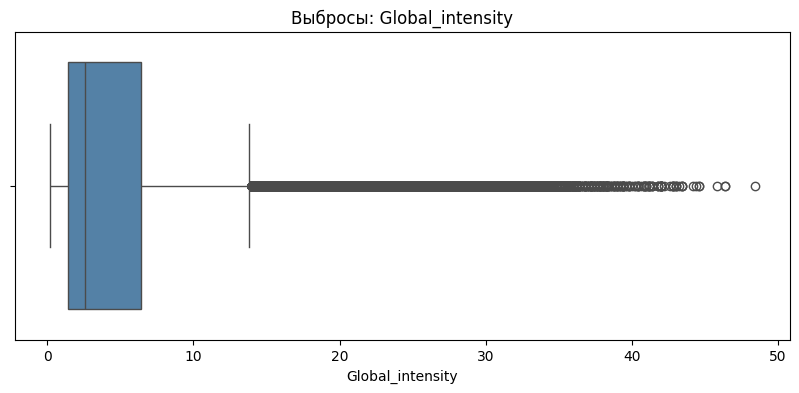

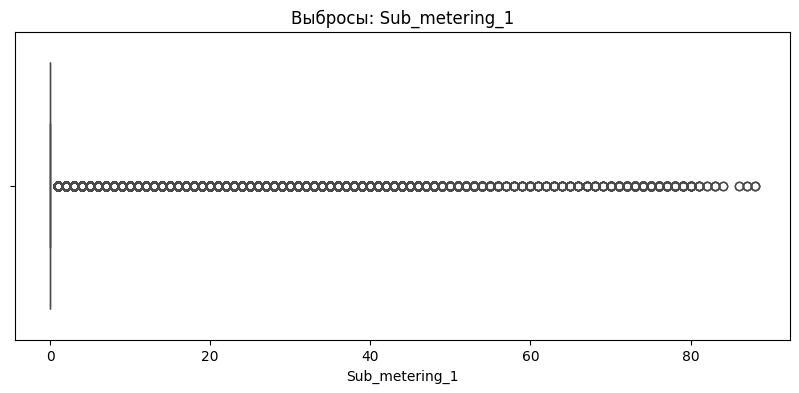

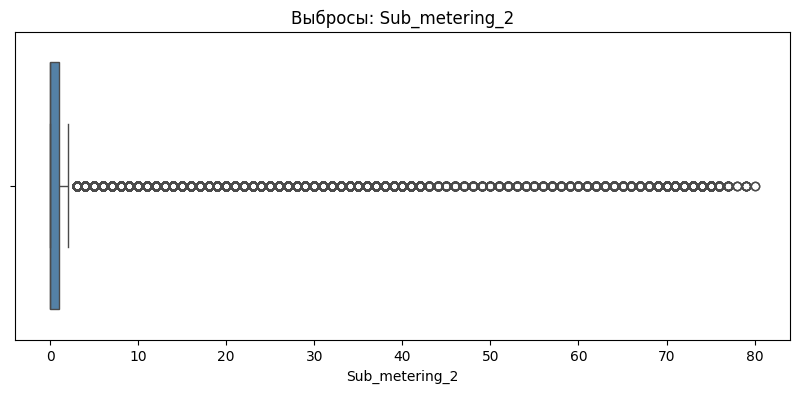

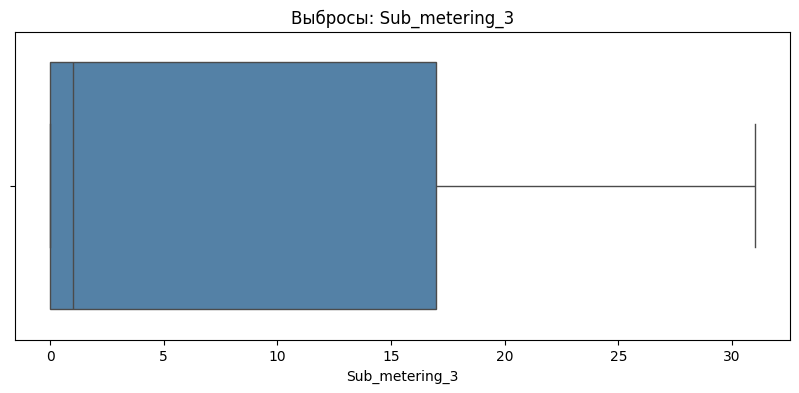

In [ ]:
num_cols = [
    "Global_active_power", "Global_reactive_power", "Voltage",
    "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"
]

for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], color="steelblue")
    plt.title(f"Выбросы: {col}")
    plt.xlabel(col)
    plt.show()


# --------------------------------
# Выводы
# --------------------------------

In [ ]:
"""
ПРОПУСКИ:

Все основные показатели (Global_active_power, Voltage, Intensity, Sub_metering) имеют ~26 тыс. пропусков.
На фоне общего объёма данных (2 млн+ строк) это менее 2%, то есть не критично.
Datetime без пропусков → временной ряд целостный.
Вывод: данные достаточно полные, можно работать после очистки NaN.

ВЫБРОСЫ:

Global_intensity и Global_active_power имеют десятки тысяч выбросов (100k и 95k соответственно).
Sub_metering_1 особенно шумный (169k выбросов).
Sub_metering_3 почти без выбросов → более стабильный канал.
Voltage тоже с заметными выбросами (51k), что может отражать скачки напряжения.

Наблюдения:
Большинство выбросов появляется в моменты резких скачков нагрузок.
Sub_metering_1 — крайне нестабильная линия, вероятно бытовой нагреватель.
Sub_metering_3 — чистый, стабильный — отличный предиктор.

Гипотезы:
Выбросы в Global_active_power соответствуют:
включению мощных устройств,
резким переходам «вкл/выкл»,
поведению пользователей (готовка, нагрев воды).

Важность:
Выбросы нужно оставлять, потому что они отражают реальное поведение потребления.

Вывод: потребление сильно варьируется, особенно по интенсивности и отдельным подканалам. Для прогноза нужно либо сглаживание, либо robust‑методы.

КОРЕЛЯЦИЯ:

Pearson (линейные связи):
Global_active_power ↔ Global_intensity: почти идеальная корреляция (0.999).
Global_active_power ↔ Sub_metering_3: высокая (0.64).
Voltage отрицательно коррелирует с активной мощностью (‑0.40).

Spearman (монотонные связи):
Картина похожа: активная мощность и интенсивность почти полностью связаны (0.995).
Sub_metering_3 снова заметно связан (0.60).
Voltage остаётся отрицательным фактором.

Вывод:
Global_intensity фактически дублирует активную мощность.
Sub_metering_3 отражает значимую часть нагрузки.
Voltage ведёт себя противоположно — при росте нагрузки напряжение падает.

АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО ВРЕМЕНИ

Диаграмма распределения по часам
Наблюдения:
Чёткий суточный цикл.
Минимальное потребление ночью (1–6 часов).
Рост с 7 часов утра.
Два выраженных пика:
Утренний пик: 7–9
Вечерний пик: 18–21 — самый сильный.

Гипотезы:
Утром включают кухонные приборы + бойлер.
Вечером — готовка, стирка, уборка, телевизоры, обогреватели.

Важность:
Суточная сезонность обязательна для моделей — LSTM, Prophet, SARIMA.

Диаграмма по дням недели
Наблюдения:

Отличий немного, но:
На выходных потребление выше, особенно вечером.
У рабочих дней более ровный профиль.

Гипотезы:
В будни жильцы часть дня вне дома.
В выходные — готовка, бытовые приборы, вечерняя активность.

Важность:
Нужна фича: is_weekend, она усилит модель.

Диаграмма по месяцам
Наблюдения:

Зима (декабрь–февраль) — значительный рост потребления.
Лето (июль–август) — падение.
Плавные переходы между сезонами.

Гипотезы:
Зимой включают обогреватели → растёт Global_active_power.
Летом меньше готовят дома, больше открыты окна → ниже нагрузка.

Важность:
Хорошо выраженная годовая сезонность — пригодится для SARIMA(P, D, Q, s=365).


АНАЛИЗ СЕЗОННОСТИ
Daily Seasonality (day pattern)

Наблюдения:
Суточные циклы повторяются почти идеально:
низ — ночью,
резкий подъём утром,
долгий вечерний пик.

Гипотезы:
Привычка жильцов стабильно повторяется.

Seasonality Month × Year
Наблюдения:
Жёсткая годовая структура:
пики — холодные сезоны,
спады — летние месяцы.
Бывают отдельные дни с превышением нормы → вероятно праздники/выходные.

Гипотезы:
Аномальные пики: семья дома весь день или использование мощных приборов.



ОПИСАТЕЛЬНАЯ СТАТИСТИКА:

Среднее активное потребление ≈ 1.09 кВт, но максимум доходит до 11.1 кВт → резкие пики.
Интенсивность: среднее 4.6 А, максимум 48 А → тоже скачки.
Voltage: среднее 240 В, диапазон 223–254 В → напряжение относительно стабильное, но с колебаниями.
Sub_metering: медианы почти нулевые, но редкие всплески (например, Sub_metering_1 до 88, Sub_metering_2 до 80).
Sub_metering_3 имеет более высокую среднюю нагрузку (6.45) и широкий разброс.

Вывод:
Основное потребление идёт через Global_active_power и Sub_metering_3.
Остальные подканалы чаще пустые, но иногда дают резкие всплески.
Система характеризуется низким средним потреблением и редкими экстремальными скачками.

ИТОГОВЫЕ ВЫВОДЫ:
Датасет обладает сильной суточной и годовой сезонностью — идеально подходит для моделей прогноза.
Выбросы отражают реальное потребление, удалять их нельзя.
Sub_metering_3 — ключевой предиктор, объясняет большую часть вариаций.
По часам, дням недели, месяцам потребление меняется закономерно.
Данные очень чистые, только пропуски в первые дни.
Основной индикатор нагрузки — Global_active_power, он почти полностью коррелирует с Global_intensity.
Voltage ведёт себя противоположно нагрузке: при росте мощности напряжение падает.
Sub_metering_3 — наиболее значимый подканал, отражающий реальное потребление.
Данные содержат много выбросов, что говорит о резких скачках нагрузки. Для анализа и прогноза нужно использовать методы устойчивые к выбросам (robust scaling, медианные фильтры).
Среднее потребление относительно невысокое (≈1 кВт), но система подвержена экстремальным нагрузкам до 11 кВт.

РЕКОМЕНДАЦИИ ДЛЯ ПОСТРОЕНИЯ МОДЕЛИ
Обязательно добавить фичи:
Час суток (0–23)
День недели (0–6)
Месяц
is_weekend
is_winter / is_summer
lag-фичи (1, 24, 48)
rolling mean (3 часа, 24 часа)
экспоненциальные сглаживания
Для прогнозов:
SARIMA для макро-сезонности.
Prophet для комбинированной сезонности.
LSTM / Temporal Convolutional Networks для нелинейных зависимостей.
CatBoostRegressor для смешанных фичей.
"""

'\nПРОПУСКИ:\n\nВсе основные показатели (Global_active_power, Voltage, Intensity, Sub_metering) имеют ~26 тыс. пропусков.\nНа фоне общего объёма данных (2 млн+ строк) это менее 2%, то есть не критично.\nDatetime без пропусков → временной ряд целостный.\nВывод: данные достаточно полные, можно работать после очистки NaN.\n\nВЫБРОСЫ:\n\nGlobal_intensity и Global_active_power имеют десятки тысяч выбросов (100k и 95k соответственно).\nSub_metering_1 особенно шумный (169k выбросов).\nSub_metering_3 почти без выбросов → более стабильный канал.\nVoltage тоже с заметными выбросами (51k), что может отражать скачки напряжения.\n\nВывод: потребление сильно варьируется, особенно по интенсивности и отдельным подканалам. Для прогноза нужно либо сглаживание, либо robust‑методы.\n\nКОРЕЛЯЦИЯ:\n\nPearson (линейные связи):\nGlobal_active_power ↔ Global_intensity: почти идеальная корреляция (0.999).\nGlobal_active_power ↔ Sub_metering_3: высокая (0.64).\nVoltage отрицательно коррелирует с активной мощност